In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [318]:
url = 'nfL6.json'
df = pd.read_json(url)

In [319]:
df1 = df[['question', 'main_category']]
df1.head()

,question,main_category
0,Why did the U.S Invade Iraq ?,News & Events
1,How to get rid of a beehive?,Education & Reference
2,Why don't European restaurants serve water?,Society & Culture
3,Why hybrid cars gas mileage is better in city ?,Cars & Transportation
4,Can someone explain the theory of e=mc2?,Science & Mathematics


In [320]:
len(df1)

87362

#### check the maximum length of questions

110


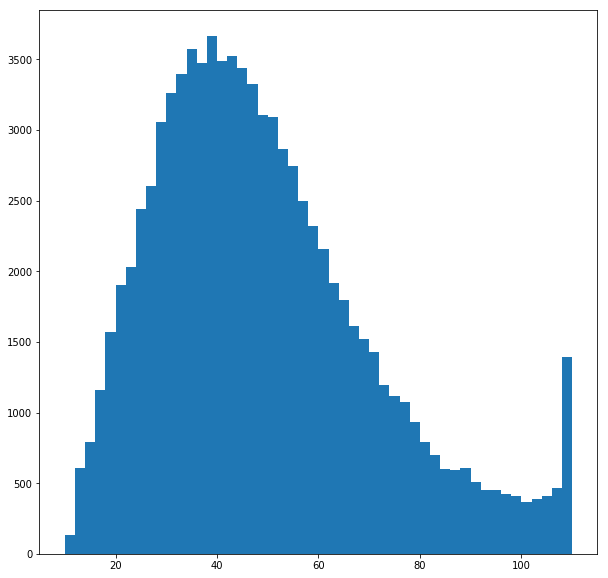

In [321]:
len_question = [len(x) for x in df1['question']]
print(max(len_question))
plt.figure(figsize=(10, 10))

plt.hist(len_question, bins=50)
plt.show()

## make a dataset only with questions

In [322]:
questions = pd.DataFrame(df1['question'])
print(len(questions))
questions[:10]

87362


,question
0,Why did the U.S Invade Iraq ?
1,How to get rid of a beehive?
2,Why don't European restaurants serve water?
3,Why hybrid cars gas mileage is better in city ?
4,Can someone explain the theory of e=mc2?
5,"For colIege admission, is it better to take AP..."
6,Why didn't anyone send more buses to the Super...
7,how do Elephants communicate?
8,"why does dogs, which have an excellent smell s..."
9,How to boil lobster?


In [323]:
from matplotlib.backends.backend_pdf import PdfPages

import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import table

def save_table_as_fig(df, filename):
    plt.figure(figsize=(10,10))
    ax = plt.subplot(111, frame_on=False) # no visible frame
    ax.xaxis.set_visible(False)  # hide the x axis
    ax.yaxis.set_visible(False)  # hide the y axis

    table(ax, df, loc='upper right')  # where df is your data frame

    plt.savefig(filename, dpi=100)

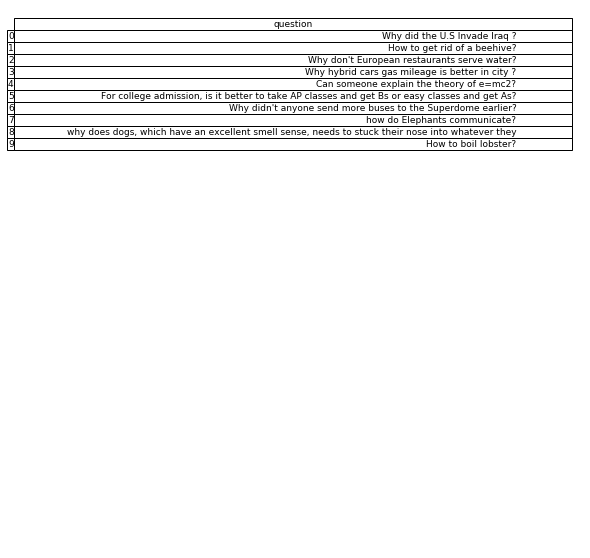

In [324]:
df = questions[:10]

save_table_as_fig(df, 'mytable.png')

## Text preprocessing:

#### install NLTK for word tokenization

In [325]:
#!pip install nltk

In [127]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/mariam/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [326]:
import re
from nltk.tokenize import WhitespaceTokenizer, word_tokenize
def preprocessing(question):
    new_question = []
    question = WhitespaceTokenizer().tokenize(question)  #tokenize by white space, I also tried word tokenize but it gives a very bad result when using NER and POS
    for word in question:
        w = re.sub(r'[^\w\s\"$<>]','',word) #remove everything except words and space, we also keep $, <, > to identify pos and ner tagging in a string
        w = WordNetLemmatizer().lemmatize(w)                            
        new_question.append(w)
    return new_question

In [327]:
preprocessing('how to properly use "farther" and "further" in a sentence?')

['how',
 'to',
 'properly',
 'use',
 '"farther"',
 'and',
 '"further"',
 'in',
 'a',
 'sentence']

## Select a subset of the new dataset in order to fit it in the memory 

In [312]:
ind = np.random.choice(len(questions), len(questions)-3000, replace=False)
train_data = questions.drop(ind, axis=0)
len(train_data)

3000

## Install Flair

In [9]:
#!pip install flair

## Import Flair library 

In [10]:
from flair.data import Sentence

from flair.models import SequenceTagger
# make a sentence


2019-06-04 23:09:35,045 loading file /home/mariam/.flair/models/en-ner-conll03-v0.4.pt


## Define the different classes of word we that matter

In [313]:
meaningful_pos = ['<NN>', '<NNS>', '<NNP>','<NNPS>',                #Nouns
                 '<PRP$>',                                #Pronouns
                  '<JJ>' , '<JJR>', '<JJS>' ,                        ##adjective
                  '<RB>', '<RBS>', '<RBR>',                         #Adverbe
                 '<VB>', '<VBD>','<VBG>', 'VBN>', '<VBZ>','<VBP>',  #Verbs
                 '<IN>', '<CD>',                            ##conjunction-subordinating(before, after, on), cardinal number(five, four)
                 '<FW>',                                    ##foreign words
                 '<MD>']                                   ##Modal (Can,  may)                  

In [277]:
def get_ner(question):
    # load the NER tagger
    tagger_ner = SequenceTagger.load('ner-fast')  ## Use ner-fast ecause we are not running on GPU
    sent = Sentence(question)
    tagger_ner.predict(sent)
    s = sent.to_tagged_string()
    se = preprocessing(s)
    ner = []
    #print(se)
    for i in range(len(se)-1):
        if se[i+1] and se[i+1][0] and se[i+1][0] == '<':
            ner.append(se[i])
    return ner


#### Run NER on the 10 first question (for time purpose)

2019-06-07 21:02:23,208 loading file /home/mariam/.flair/models/en-ner-fast-conll03-v0.2.pt
2019-06-07 21:02:24,287 loading file /home/mariam/.flair/models/en-ner-fast-conll03-v0.2.pt
2019-06-07 21:02:26,142 loading file /home/mariam/.flair/models/en-ner-fast-conll03-v0.2.pt
2019-06-07 21:02:27,244 loading file /home/mariam/.flair/models/en-ner-fast-conll03-v0.2.pt
2019-06-07 21:02:29,247 loading file /home/mariam/.flair/models/en-ner-fast-conll03-v0.2.pt
2019-06-07 21:02:31,233 loading file /home/mariam/.flair/models/en-ner-fast-conll03-v0.2.pt
2019-06-07 21:02:32,501 loading file /home/mariam/.flair/models/en-ner-fast-conll03-v0.2.pt
2019-06-07 21:02:34,439 loading file /home/mariam/.flair/models/en-ner-fast-conll03-v0.2.pt
2019-06-07 21:02:35,528 loading file /home/mariam/.flair/models/en-ner-fast-conll03-v0.2.pt
2019-06-07 21:02:37,608 loading file /home/mariam/.flair/models/en-ner-fast-conll03-v0.2.pt


,question,ner
0,Why did the U.S Invade Iraq ?,"[US, Iraq]"
1,How to get rid of a beehive?,[]
2,Why don't European restaurants serve water?,[European]
3,Why hybrid cars gas mileage is better in city ?,[]
4,Can someone explain the theory of e=mc2?,[]
5,"For colIege admission, is it better to take AP...",[AP]
6,Why didn't anyone send more buses to the Super...,[Superdome]
7,how do Elephants communicate?,[]
8,"why does dogs, which have an excellent smell s...",[]
9,How to boil lobster?,[]


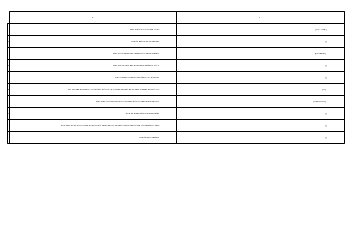

In [239]:
ner = []
for question in df['question']:
    #print(get_ner(question))
    ner.append((question,get_ner(question)))
ner = pd.DataFrame(ner)
save_table_as_fig(ner, 'ner.svg')
ner.columns = ['question', 'ner']
ner

In [278]:
def get_pos(question):
    ##load POS tagger
    tagger_ner = SequenceTagger.load('pos-fast')  ##use pos-fast see that we are not running on GPU
    sent = Sentence(question)
    tagger_ner.predict(sent)
    s = sent.to_tagged_string()
    return s


#### Run POS on the 10 first question (for time purpose)

2019-06-06 23:52:57,090 loading file /home/mariam/.flair/models/en-pos-ontonotes-fast-v0.2.pt
2019-06-06 23:52:57,742 loading file /home/mariam/.flair/models/en-pos-ontonotes-fast-v0.2.pt
2019-06-06 23:52:57,925 loading file /home/mariam/.flair/models/en-pos-ontonotes-fast-v0.2.pt
2019-06-06 23:52:58,141 loading file /home/mariam/.flair/models/en-pos-ontonotes-fast-v0.2.pt
2019-06-06 23:52:58,399 loading file /home/mariam/.flair/models/en-pos-ontonotes-fast-v0.2.pt
2019-06-06 23:52:58,599 loading file /home/mariam/.flair/models/en-pos-ontonotes-fast-v0.2.pt
2019-06-06 23:52:58,930 loading file /home/mariam/.flair/models/en-pos-ontonotes-fast-v0.2.pt
2019-06-06 23:52:59,180 loading file /home/mariam/.flair/models/en-pos-ontonotes-fast-v0.2.pt
2019-06-06 23:52:59,376 loading file /home/mariam/.flair/models/en-pos-ontonotes-fast-v0.2.pt
2019-06-06 23:52:59,706 loading file /home/mariam/.flair/models/en-pos-ontonotes-fast-v0.2.pt


,question,pos
0,Why did the U.S Invade Iraq ?,Why <WRB> did <VBD> the <DT> U.S <NNP> Invade ...
1,How to get rid of a beehive?,How <WRB> to <TO> get <VB> rid <VBN> of <IN> a...
2,Why don't European restaurants serve water?,Why <WRB> don't <VB> European <JJ> restaurants...
3,Why hybrid cars gas mileage is better in city ?,Why <WRB> hybrid <JJ> cars <NNS> gas <NN> mile...
4,Can someone explain the theory of e=mc2?,Can <MD> someone <NN> explain <VB> the <DT> th...
5,"For colIege admission, is it better to take AP...","For <IN> colIege <NN> admission, <NN> is <VBZ>..."
6,Why didn't anyone send more buses to the Super...,Why <WRB> didn't <VB> anyone <NN> send <VB> mo...
7,how do Elephants communicate?,how <WRB> do <VBP> Elephants <NNS> communicate...
8,"why does dogs, which have an excellent smell s...","why <WRB> does <VBZ> dogs, <NN> which <WDT> ha..."
9,How to boil lobster?,How <WRB> to <TO> boil <VB> lobster? <.>


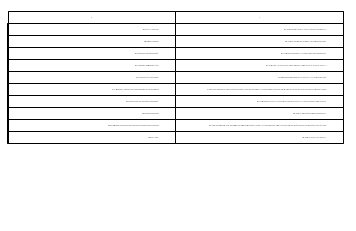

In [228]:
pos = []
for question in df['question']:
    #print(get_ner(question))
    pos.append((question,get_pos(question)))
pos = pd.DataFrame(pos)
save_table_as_fig(pos, 'pos.svg')
pos.columns = ['question', 'pos']
pos

#### Combining NER and POS 

In [328]:
def get_pos_ner(question):
    #applying NER to the question
    ner = get_ner(question)
    
    #applying POS to the question
    s = get_pos(question)
    
    #Preprocess the output from POS(No need for the NER output see that it return our function return a list)
    se = preprocessing(s)
    
    pos = []
    for i in range(len(se)-1):
        if se[i] in ner or se[i+1] in meaningful_pos:   # check if the current word is in NER or its tag is in the classes we choose for POS
            pos.append(se[i])
    return pos

#### Run NER and POS on 3000 examples (for time purpose)

In [329]:
pos_questions =[]
for question in train_data['question']:
    pos_questions.append((question, get_pos_ner(question)))

2019-06-08 11:23:38,241 loading file /home/mariam/.flair/models/en-ner-fast-conll03-v0.2.pt
2019-06-08 11:23:40,238 loading file /home/mariam/.flair/models/en-pos-ontonotes-fast-v0.2.pt
2019-06-08 11:23:40,465 loading file /home/mariam/.flair/models/en-ner-fast-conll03-v0.2.pt
2019-06-08 11:23:41,523 loading file /home/mariam/.flair/models/en-pos-ontonotes-fast-v0.2.pt
2019-06-08 11:23:41,669 loading file /home/mariam/.flair/models/en-ner-fast-conll03-v0.2.pt
2019-06-08 11:23:43,422 loading file /home/mariam/.flair/models/en-pos-ontonotes-fast-v0.2.pt
2019-06-08 11:23:43,585 loading file /home/mariam/.flair/models/en-ner-fast-conll03-v0.2.pt
2019-06-08 11:23:45,506 loading file /home/mariam/.flair/models/en-pos-ontonotes-fast-v0.2.pt
2019-06-08 11:23:45,712 loading file /home/mariam/.flair/models/en-ner-fast-conll03-v0.2.pt
2019-06-08 11:23:47,750 loading file /home/mariam/.flair/models/en-pos-ontonotes-fast-v0.2.pt
2019-06-08 11:23:47,920 loading file /home/mariam/.flair/models/en-ner

In [330]:
pos_questions = pd.DataFrame(pos_questions)
pos_questions.columns = ['question', 'keywords']
pos_questions[:10]

,question,keywords
0,Why didn't anyone send more buses to the Super...,"[didnt, anyone, send, more, bus, to, Superdome..."
1,How to boil lobster?,"[boil, lobster]"
2,How do you vote in Iraq?,"[do, vote, in, Iraq]"
3,Why do people steal the baby jesus at christmas?,"[do, people, steal, baby, jesus, at, christmas]"
4,Why does my cat love vegetables?,"[doe, my, cat, love, vegetable]"
5,How do i use RUP(rational unified process) to ...,"[do, use, RUPrational, unified, process, plan,..."
6,Why is yawning contagious?,"[is, yawning, contagious]"
7,WHY PEOPLE STEAL?,"[PEOPLE, STEAL]"
8,what is delegent mean?,"[is, delegent]"
9,How do I use k-means clustering to group obser...,"[do, use, kmeans, clustering, to, group]"


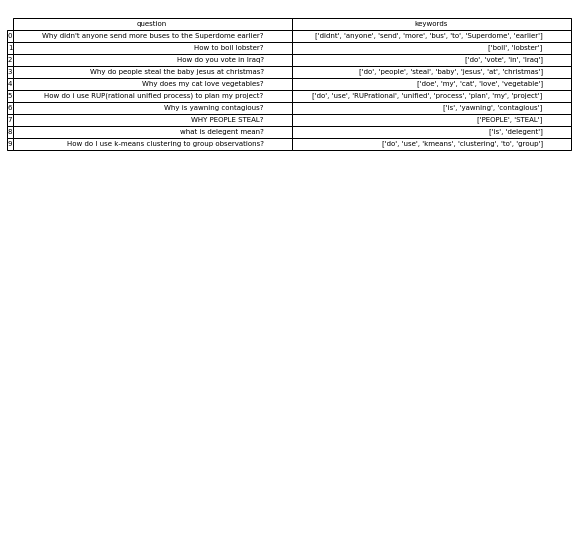

In [331]:
save_table_as_fig(pos_questions[:10], 'pos_ner.png')